<a href="https://colab.research.google.com/github/bahadirbesirkestane/Staj/blob/main/Bokeh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bokeh

In [ ]:
import pandas as pd
import numpy as np

from bokeh.io import output_file, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column, gridplot
#from bokeh.models.widgets import Panel, Tabs

In [ ]:
# Gerekli kütüphane
from bokeh.plotting import figure, output_file, show

# x ve y verilerimizi liste olarak oluşturalım

x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5] # html olarak açılacak sayfamızın adını belirtelim

output_file("cizgi.html") # Görselimize başlık, ve eksen isimlerini verelim

p = figure(title="basit cizgi grafik", x_axis_label='x', y_axis_label='y')

# Cizgi olarak x ve y eksenlerini ciz
# legend adı: Sicaklik
# Çizgi kalınlığı: 2

p.line(x, y, legend_label="Sicaklik.", line_width=2)
# Çizimi göster
show(p)

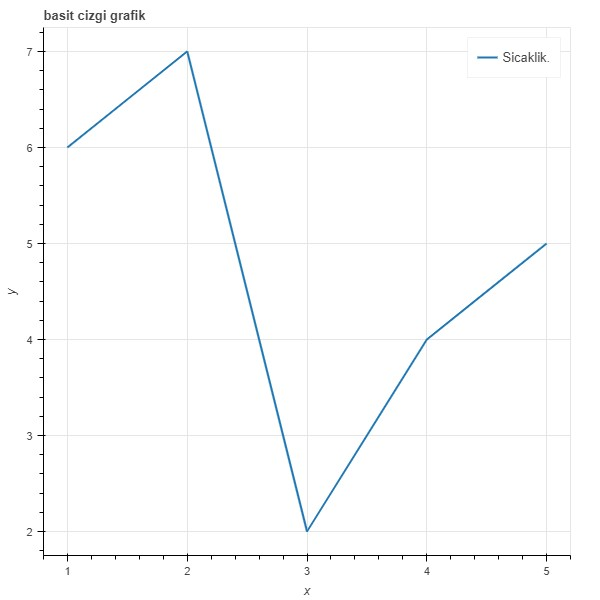

## Çoklu Veri Görselleştirme

In [ ]:
# Gerekli kütüphane
from bokeh.plotting import figure, output_file, show

# verilerimizi oluşturalım
x = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
y0 = [i**2 for i in x]
y1 = [10**i for i in x]
y2 = [10**(i**2) for i in x]

# html sayfamızın adı
output_file("log_cizgi.html")

# cizimi olustur
# tools ile hangi araclar eklenecek belirtiyoruz
# y_axis_type ile y eksenimizin logaritmik artacağı
# y_range ile eksen aralığı belirtiliyor
# diğerlerini üst kodda anlatmıştık
p = figure(
   tools="pan,box_zoom,reset,save",
   y_axis_type="log", y_range=[0.001, 10**11], title="logaritmik gösterim",
   x_axis_label='x ekseni', y_axis_label='y ekseni'
)

# Görsellerimizi çizgi ve scatter (nokta) türleriyle oluşturalım
p.line(x, x, legend_label="y=x")
p.circle(x, x, legend_label="y=x", fill_color="white", size=8)
p.line(x, y0, legend_label="y=x^2", line_width=3)
p.line(x, y1, legend_label="y=10^x", line_color="red")
p.circle(x, y1, legend_label="y=10^x", fill_color="red", line_color="red", size=6)
p.line(x, y2, legend_label="y=10^x^2", line_color="orange", line_dash="4 4")

# Çizimi göster
show(p)

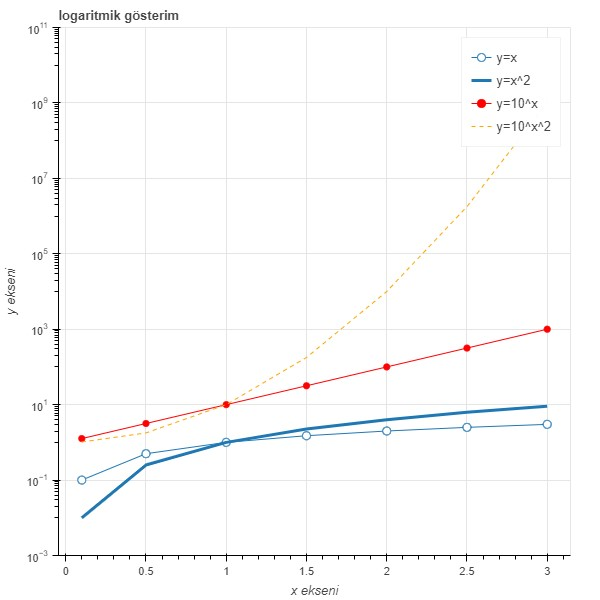

In [ ]:
# Gerekli kütüphaneler
import numpy as np

from bokeh.plotting import figure, output_file, show

# Veriyi oluşturalım
N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
# Görseli renk olarak zenginleştirelim
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

# html sayfamız
output_file("color_scatter.html", title="color_scatter.py example", mode="cdn")
# Görsel için ekleyeceğimiz tool'lar
# lütsen görselde herbir tool'u tıklayarak hangi işlevi yerine
# getirdiğini gözlemleyin
TOOLS = "crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select"

# p görselini aralık ve tool'ları ile oluştur
p = figure(tools=TOOLS, x_range=(0, 100), y_range=(0, 100))

# scatter (nokta)
p.circle(x, y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)

# show the results
show(p)

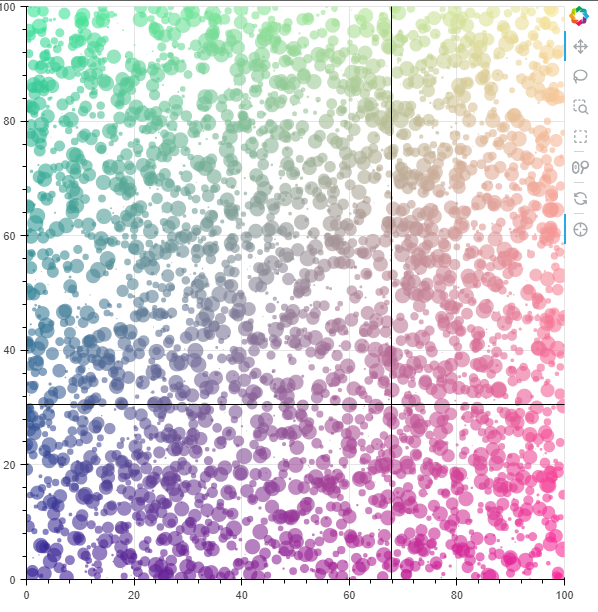

## Birden Fazla Grafik Çizme

In [ ]:
# Gerekli kütüphaneler
import numpy as np

from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_file, show

# verimizi oluşturalım
N = 100
x = np.linspace(0, 4*np.pi, N)
y0 = np.sin(x)
y1 = np.cos(x)
y2 = np.sin(x) + np.cos(x)

# html sayfamız
output_file("linked_panning.html")

# 1. çizim
s1 = figure(width=250, height=250, title=None)
s1.circle(x, y0, size=10, color="navy", alpha=0.5)

# 2. çizim
s2 = figure(width=250, height=250, x_range=s1.x_range, y_range=s1.y_range, title=None)
s2.triangle(x, y1, size=10, color="firebrick", alpha=0.5)

# 3. çizim
s3 = figure(width=250, height=250, x_range=s1.x_range, title=None)
s3.square(x, y2, size=10, color="olive", alpha=0.5)

# gridplot ile çizimleri beraber olarak alma
p = gridplot([[s1, s2, s3]], toolbar_location=None)

# çizimleri gösterelim
show(p)

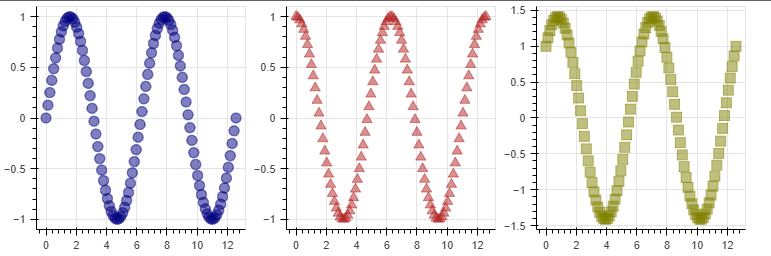

## Grafiğe Slider ekleme

In [ ]:
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_file, show
from bokeh.models import Slider, CustomJS
from bokeh.layouts import row, widgetbox

import numpy as np

sr = 44100
x = np.linspace(0,1,sr)
y = np.sin(2*1*np.pi*x)

source = ColumnDataSource(data=dict(x=x,y=y))
# DIKKAT: veri kumemizi bir sozuk formatina cevirip
# sonra ColumnDataSource olusturmamiz gerekiyor.
# Burasi yapilmazsa JS tarafinda veriye erisim saglayamiyorsunuz.

fig = figure(x_axis_label = "Time", y_axis_label="Amplitude")
fig.line('x','y',source=source)
# x,y olarak direk vermek yerine Source'u ve Sourcedaki sozluk yapisinin anahtarlarini veriyoruz
# Yukarida dict(x=x,y=y) seklinde tanimladik.

# customJS callback icine bir veri kumesi bir de JavaScript kodu vermemiz gerekiyor
callback = CustomJS(args=dict(source=source), code="""
    var data = source.data; // elimize gecen veri
    var F = freq.value; // burayi asagida anlatacagim.
    x = data['x']; // sozlukten x anahtarini al
    y = data['y']; // y anahtarini al
    for(var i=0;i<x.length;i++){
        y[i] = Math.sin(x[i]*F*2*Math.PI); // F degerine uygun bir sinus dalgasi olustur
    }
    console.log(y);
    source.change.emit(); // degisiklik oldugunu bildir.
""")

# Slider olustur. 1 ile 10 arasinda birer birer artsin.
# Ve yukarida yazdigimiz callback'i calistirsin
slider = Slider(start=1,end=10,value=1,step=1.,title="Frequency",callback=callback)
callback.args["freq"] = slider # Asagida anlatacagim dedigim kisim burasi
# slider oynadikca bir freq degiskeni callback'in icine gidiyor. biz de onun
# freq.value diyerek degerini okuyoruz ve gorsellestirmeyi degistiriyoruz.

output_file("sample_plot.html")
layout = row(fig,widgetbox(slider))
show(layout)

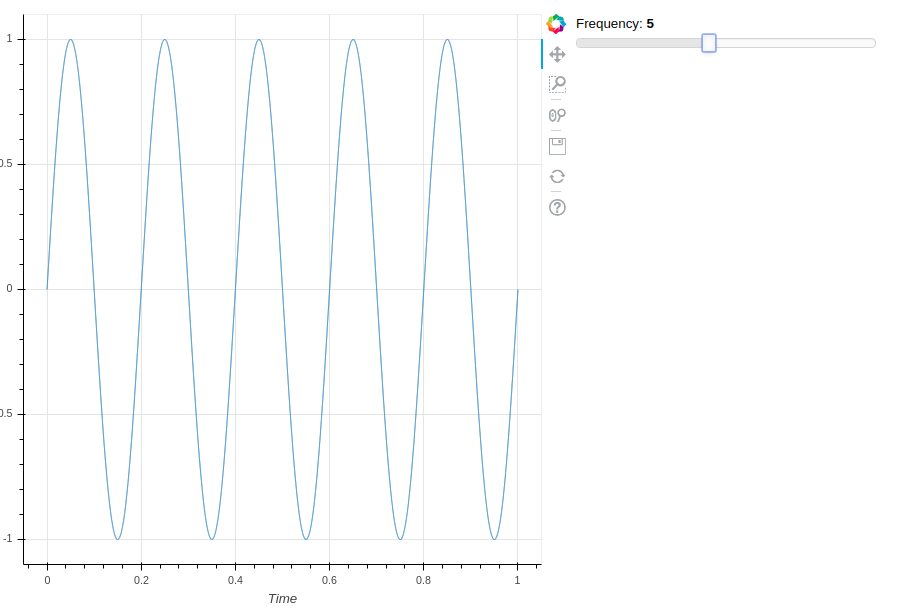

## Kutu Grafiği

In [ ]:
import pandas as pd

from bokeh.models import ColumnDataSource, Whisker
from bokeh.plotting import figure, show
from bokeh.sampledata.autompg2 import autompg2
from bokeh.transform import factor_cmap

df = autompg2[["class", "hwy"]].rename(columns={"class": "kind"})

kinds = df.kind.unique()

# compute quantiles
qs = df.groupby("kind").hwy.quantile([0.25, 0.5, 0.75])
qs = qs.unstack().reset_index()
qs.columns = ["kind", "q1", "q2", "q3"]
df = pd.merge(df, qs, on="kind", how="left")

# compute IQR outlier bounds
iqr = df.q3 - df.q1
df["upper"] = df.q3 + 1.5*iqr
df["lower"] = df.q1 - 1.5*iqr

source = ColumnDataSource(df)

p = figure(x_range=kinds, tools="", toolbar_location=None,
           title="Highway MPG distribution by vehicle class",
           background_fill_color="#eaefef", y_axis_label="MPG")

# outlier range
whisker = Whisker(base="kind", upper="upper", lower="lower", source=source)
whisker.upper_head.size = whisker.lower_head.size = 20
p.add_layout(whisker)

# quantile boxes
cmap = factor_cmap("kind", "TolRainbow7", kinds)
p.vbar("kind", 0.7, "q2", "q3", source=source, color=cmap, line_color="black")
p.vbar("kind", 0.7, "q1", "q2", source=source, color=cmap, line_color="black")

# outliers
outliers = df[~df.hwy.between(df.lower, df.upper)]
p.scatter("kind", "hwy", source=outliers, size=6, color="black", alpha=0.3)

p.xgrid.grid_line_color = None
p.axis.major_label_text_font_size="14px"
p.axis.axis_label_text_font_size="12px"

show(p)

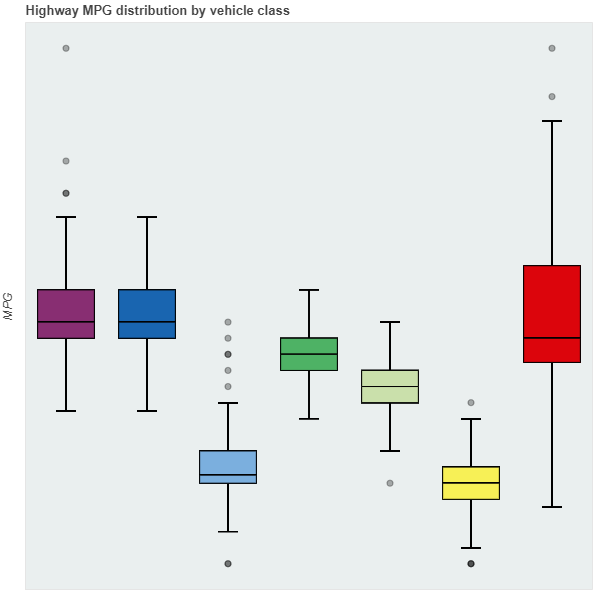

## Harita renklendirme ve Cursor

In [ ]:
from bokeh.models import LogColorMapper
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure, show
import bokeh.sampledata
bokeh.sampledata.download()
from bokeh.sampledata.unemployment import data as unemployment
from bokeh.sampledata.us_counties import data as counties


palette = tuple(reversed(palette))

counties = {
    code: county for code, county in counties.items() if county["state"] == "tx"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
color_mapper = LogColorMapper(palette=palette)

data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
)

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Texas Unemployment, 2009", tools=TOOLS,
    x_axis_location=None, y_axis_location=None,
    tooltips=[
        ("Name", "@name"), ("Unemployment rate", "@rate%"), ("(Long, Lat)", "($x, $y)"),
    ])
p.grid.grid_line_color = None
p.hover.point_policy = "follow_mouse"

p.patches('x', 'y', source=data,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

show(p)

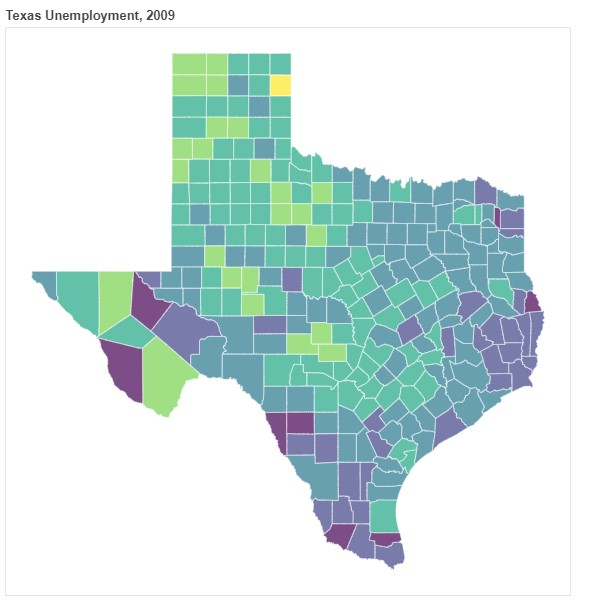

## color_sliders
İnteraktif reng grafiği

In [ ]:
# noqa: E501
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, CustomJS, Slider
from bokeh.plotting import curdoc, figure, show
from bokeh.themes import Theme

color = R, G, B = (75, 125, 125)
text_color = (255, 255, 255)

# create a data source to enable refreshing of fill & text color
source = ColumnDataSource(data=dict(color=[color], text_color=[text_color]))

# create first plot, as a rect() glyph and centered text label, with fill and text color taken from source
p = figure(x_range=(-8, 8), y_range=(-4, 4),
           width=400, height=300,
           title='move sliders to change', tools='')

p.rect(0, 0, width=18, height=10, fill_color='color',
        line_color = 'black', source=source)

p.text(0, 0, text='color', text_color='text_color',
       alpha=0.6667, text_font_size='48px', text_baseline='middle',
       text_align='center', source=source)

red = Slider(title="R", start=0, end=255, value=R, step=1)
green = Slider(title="G", start=0, end=255, value=G, step=1)
blue = Slider(title="B", start=0, end=255, value=B, step=1)

callback = CustomJS(args=dict(source=source, red=red, blue=blue, green=green), code="""
    function toHex(c) {
        const hex = c.toString(16)
        return hex.length == 1 ? "0" + hex : hex
    }

    const R = red.value | 0
    const G = green.value | 0
    const B = blue.value | 0

    const color = "#" + toHex(R) + toHex(G) + toHex(B)
    const text_color = ((R > 127) || (G > 127) || (B > 127)) ? '#000000' : '#ffffff'
    source.data = { color: [color], text_color: [text_color] }
""")

red.js_on_change('value', callback)
blue.js_on_change('value', callback)
green.js_on_change('value', callback)

# theme everything for a cleaner look
curdoc().theme = Theme(json={
    "attrs": {
        "Plot": { "toolbar_location": None },
        "Grid": { "grid_line_color": None },
        "Axis": {
            "axis_line_color": None,
            "major_label_text_color": None,
            "major_tick_line_color": None,
            "minor_tick_line_color": None,
        },
    },
})

show(column(red, green, blue, p))

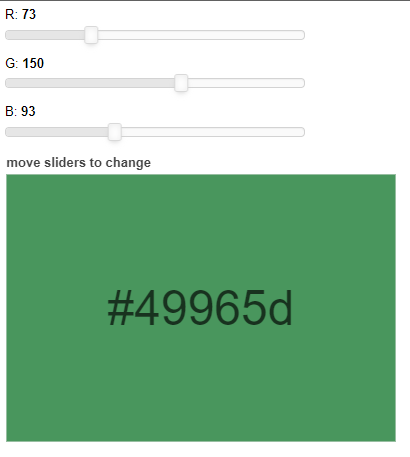

## Takvim
Tarih seçilebilir takvim.

In [ ]:
from bokeh.io import show
from bokeh.models import CustomJS, DatePicker

date_picker = DatePicker(
    title="Select date",
    value="2023-09-22",
    min_date="2023-08-01",
    max_date="2023-10-30",
)
date_picker.js_on_change("value", CustomJS(code="""
    console.log("date_picker: value=" + this.value, this.toString())
"""))

show(date_picker)

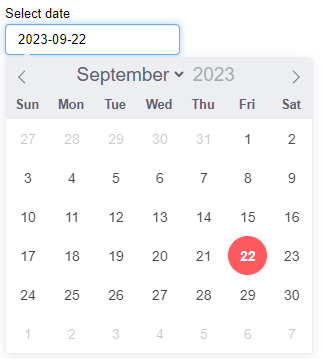

## Dropdown butonu

In [ ]:
from bokeh.io import show
from bokeh.models import CustomJS, Dropdown

menu = [("Item 1", "item_1"), ("Item 2", "item_2"), None, ("Item 3", "item_3")]

dropdown = Dropdown(label="Dropdown button", button_type="warning", menu=menu)
dropdown.js_on_event("menu_item_click", CustomJS(code="console.log('dropdown: ' + this.item, this.toString())"))

show(dropdown)

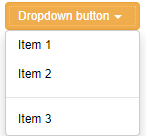